## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk

## Reading and Understanding our Data

In [3]:
# Read our data

df = pd.read_csv("./Reviews.csv")
df_2 = pd.read_csv("./Reviews.csv")

In [36]:
# How many reviews we have

df.shape

(568454, 10)

In [37]:
# Look our dataset

df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
# Let's take a closer look on the review

df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [39]:
# See how many null values we have

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [40]:
# Let's drop some null values since we have not much

df.dropna(inplace=True)

In [41]:
# Now our dataset has no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [42]:
# Lets explore our data

print(df['Score'])

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568411, dtype: int64


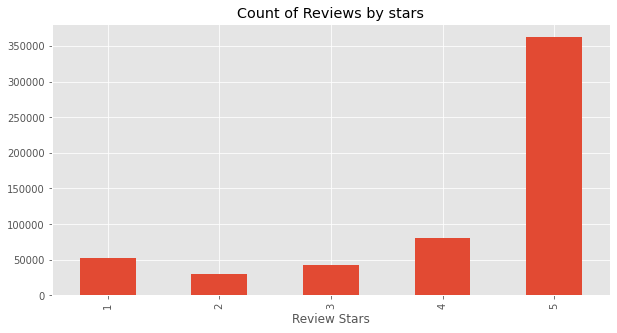

In [43]:
# We'll count how many we have of each category

ax = df['Score'].value_counts().sort_index().plot(
    kind="bar", 
    title='Count of Reviews by stars', 
    figsize =(10,5))

ax.set_xlabel('Review Stars')
plt.show()

In [66]:
example = df['Text'][30]

print(example)

I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)


## NLTK

In [68]:
# Tokenizing the words

tokens = nltk.word_tokenize(example)
tokens[:20]

['I',
 'have',
 'never',
 'been',
 'a',
 'huge',
 'coffee',
 'fan',
 '.',
 'However',
 ',',
 'my',
 'mother',
 'purchased',
 'this',
 'little',
 'machine',
 'and',
 'talked',
 'me']

In [69]:
# Seeing the Parth of Speech (Pos) tags of the words. Nouns, Verbs, etc.

tagged = nltk.pos_tag(tokens)
tagged[:10]


[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB')]

In [73]:
# Let's group these tokens in entities, chunking them together

entities = nltk.chunk.ne_chunk(tagged)

entities[:10]


[('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('huge', 'JJ'),
 ('coffee', 'NN'),
 ('fan', 'NN'),
 ('.', '.'),
 ('However', 'RB')]

## We'll use VADER in the first part to do a sentiment analysis. 

VADER basically categorizes the words into positive, neutral and negative.

It does not take into account the relationship between words.

It uses a bag of words approach:

    1 - Stop words are removed.
    2 - Each word is scored and combined into a total score.


In [48]:
# Import our packages
# We'll use the tqdm library so we can have a nice progress bar!!

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from time import sleep
sia = SentimentIntensityAnalyzer()

In [49]:
# Seeing how SentimentIntensityAnalyzer works

sia.polarity_scores("I'm so happy happy")

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.8396}

In [50]:
sia.polarity_scores("I'm so happy sad, worst")

{'neg': 0.564, 'neu': 0.146, 'pos': 0.291, 'compound': -0.5788}

In [51]:
sia.polarity_scores("example")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [52]:
# Run the polarity score on our dataset

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/568411 [00:00<?, ?it/s]

In [53]:
# Let's create a DataFrame with our dictionary and invert it with T, since it's on the wrong side.

vaders = pd.DataFrame(res).T


In [54]:
# Renaming our columns to Id so we can merge with our original dataset


vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how = 'left')

In [55]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Vader Plot

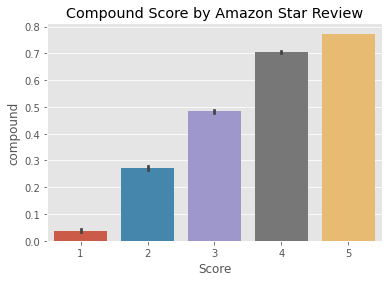

In [56]:
# We're going to do some plots to see if Vader indeed help us categorize the sentiment of the consumers

ax = sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

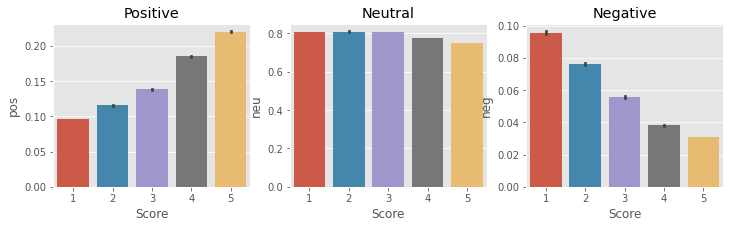

In [57]:
# Here we can see that Vader indeed can group the sentiment of the customers
# The comments are increasing positive as the stars reviews goes up
# For all stars the neutral reviews flatten out
# Finally, the comments are more negative on the lower reviews
# Which is what we would expect!!

fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout 
plt.show()

In [58]:
sns.pairplot(data = results_df , 
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 
                   'roberta_neg', 'roberta_neu','roberta_pos'],
             hue = 'Score',
             palette = 'tab8')

plt.show()

NameError: name 'results_df' is not defined

## Spacy

In [31]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [32]:
from spacy.lang.en.stop_words import STOP_WORDS

In [33]:
stopwords = list(STOP_WORDS)

In [34]:
stopwords

['although',
 'none',
 'does',
 'go',
 'their',
 'two',
 'anyway',
 'can',
 'who',
 'besides',
 'it',
 'toward',
 're',
 'mostly',
 'whether',
 'do',
 'every',
 'bottom',
 'into',
 'should',
 'someone',
 'eight',
 'doing',
 'a',
 'least',
 'me',
 'seems',
 'noone',
 '’s',
 'so',
 'neither',
 'six',
 'anyhow',
 'quite',
 'whereupon',
 'onto',
 'hundred',
 'ever',
 'have',
 'also',
 'itself',
 'being',
 'up',
 "'s",
 'meanwhile',
 'throughout',
 'before',
 'various',
 'per',
 'n’t',
 'part',
 'still',
 "'d",
 'yourself',
 'which',
 'much',
 '‘s',
 'amount',
 'perhaps',
 'ten',
 'nine',
 'would',
 'above',
 'wherein',
 'not',
 '’re',
 'off',
 'i',
 '’m',
 'then',
 'next',
 'am',
 'just',
 'here',
 'twelve',
 'no',
 'those',
 '‘m',
 'themselves',
 'using',
 'indeed',
 'more',
 'our',
 'us',
 'by',
 'first',
 'she',
 'the',
 'only',
 'afterwards',
 'beyond',
 '‘re',
 'are',
 'ca',
 'everywhere',
 'latter',
 'keep',
 'whereby',
 'already',
 'whereas',
 'other',
 'than',
 'my',
 'anything',
 

In [35]:
len(stopwords)

326

In [42]:
df_2.drop(columns=['ProductId','UserId', 'ProfileName', 'Time'], inplace=True)

In [43]:
df_2.head(5)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [44]:
df_2['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [46]:
df_2['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [49]:
df_2.dropna(inplace=True)

In [50]:
df_2.isnull().any()

Id                        False
HelpfulnessNumerator      False
HelpfulnessDenominator    False
Score                     False
Summary                   False
Text                      False
dtype: bool

## Tokenization

In [55]:
import string

In [56]:
punct = string.punctuation 

In [57]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
def text_data_cleaning(sentences):
    doc = nlp(sentences)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip() 
        else:
            temp = token.lower_
        tokens.append(temp)
        
        
    cleaned_tokens = []
    
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens
        

## Vectorization Feature Engineering TF-IDF

In [64]:
from sklearn.svm import LinearSVC

In [65]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [69]:
df_2.head(5)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [71]:
X = df_2['Text']
y = df_2['Score']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 53)

In [77]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [103]:
from tqdm.notebook import tqdm, trange

clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x0000025F3EEC80D0>)),
                ('clf', LinearSVC())])

In [105]:
y_pred  = clf.predict(X_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.70      0.69     10315
           2       0.62      0.29      0.40      5965
           3       0.61      0.33      0.43      8659
           4       0.58      0.30      0.39     16037
           5       0.80      0.96      0.87     72710

    accuracy                           0.76    113686
   macro avg       0.66      0.52      0.56    113686
weighted avg       0.73      0.76      0.73    113686



Text(33.0, 0.5, 'Truth')

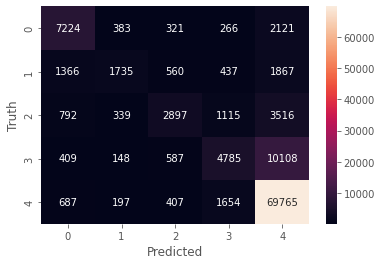

In [109]:
cm =confusion_matrix(y_test,y_pred)

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using BERT Model


In [123]:
df3 = df.copy()

In [124]:
df3.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [6]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [1]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [19]:
df_3 = df.copy()
df_3.dropna(inplace=True)

In [23]:
X = df_3['Text']
y = df_3['Score']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 53)

In [25]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [26]:
bert_model = hub.KerasLayer(encoder_url)

In [27]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
def get_sentence_embedding(sentences):
    
    model = bert_preprocess_model(sentences)
    return bert_model(model)['pooled_output']

In [29]:
e = get_sentence_embedding([
    "i ate a banana",
    "i ate pineapple",
    "i fought Elon Musk with 2 guns and 3 womans in NEW YORK with a monkey",
    'i own a car',
    'fight',
    'armagedom',
    'DOOm',
])
e

<tf.Tensor: shape=(7, 768), dtype=float32, numpy=
array([[-0.8234199 , -0.25793746,  0.3438755 , ...,  0.11373262,
        -0.5997651 ,  0.8845135 ],
       [-0.900887  , -0.4039204 , -0.6054183 , ..., -0.5246089 ,
        -0.6974028 ,  0.93074566],
       [-0.6697102 , -0.51234186, -0.78715175, ..., -0.647116  ,
        -0.63399243,  0.76714516],
       ...,
       [-0.80427694, -0.19512635,  0.44922492, ...,  0.4362874 ,
        -0.56725883,  0.8198443 ],
       [-0.8983624 , -0.31726393, -0.11139831, ...,  0.03726149,
        -0.62496024,  0.8684841 ],
       [-0.85061496, -0.23955196,  0.26935646, ...,  0.19749983,
        -0.5973498 ,  0.88584864]], dtype=float32)>

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[1]])

array([[0.870071]], dtype=float32)

In [31]:
# Bert layers

text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_model(preprocessed_text)

# Neural Layers

drop = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid',name='output')(drop)

# Final Model

model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [32]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [33]:
metrics = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
          ]


model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics = metrics)

In [ ]:
model.fit(X_train, y_train, epochs = 1)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
y_predicted= model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## WordCloud


In [59]:
from wordcloud import WordCloud

In [60]:
text = ''.join(df_3['Text'])

In [61]:
len(text)

247964457

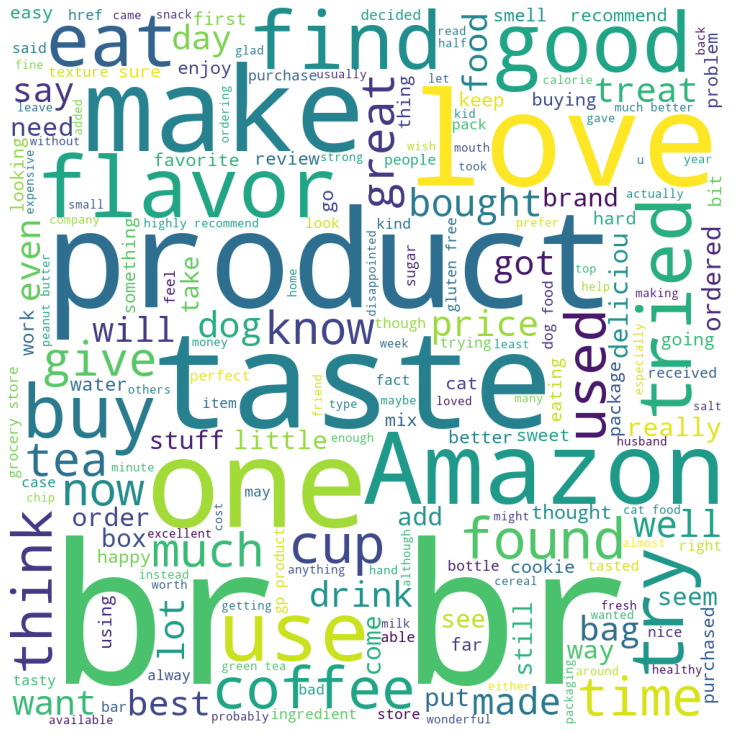

In [74]:
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color ='white').generate(text)
plt.figure(figsize=(10,10),facecolor = 'white', edgecolor='blue')
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
